In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('GOOG.csv',date_parser=True)

C:\Users\aglaw\AppData\Local\Temp\ipykernel_31836\717345494.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('GOOG.csv',date_parser=True)


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

data=df[['Close']]

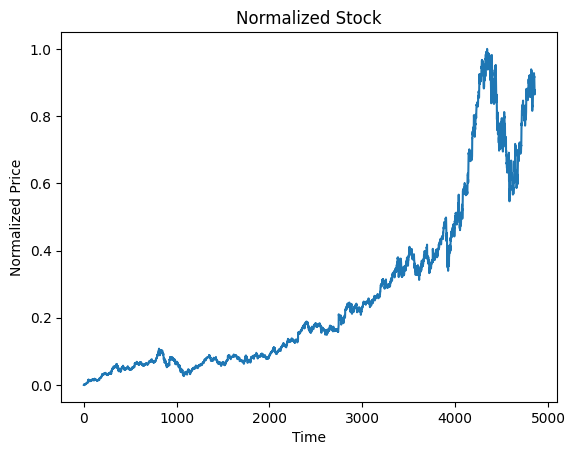

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

plt.plot(scaled_data)
plt.title("Normalized Stock")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.show()

In [8]:
def create_sequences(data,time_step=30):
    X,y=[],[]
    for i in range(time_step,len(data)):
        X.append(data[i-time_step:i,0])
        y.append(data[i,0])
    return np.array(X) , np.array(y)

In [9]:
time_step=60
X,y=create_sequences(scaled_data,time_step)

X=X.reshape(X.shape[0],X.shape[1],1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [18]:
model=Sequential()

# model.add(SimpleRNN(units=80,activation='relu', return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(SimpleRNN(units=40 ,activation='relu', return_sequences=False))
# model.add(SimpleRNN(units=40 ,activation='relu', return_sequences=True))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')


Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0029 - val_loss: 4.9505e-04
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4884e-05 - val_loss: 4.4259e-04
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2963e-05 - val_loss: 4.3781e-04
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7922e-05 - val_loss: 4.0314e-04
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9516e-05 - val_loss: 4.4004e-04
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9399e-05 - val_loss: 4.1129e-04
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8611e-05 - val_loss: 3.8254e-04
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8400e-05 - val_loss: 4.9095e-04
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6947e-05 - val_loss: 3.9642e-04
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9182e-05 - val_loss: 3.5997e-04
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.

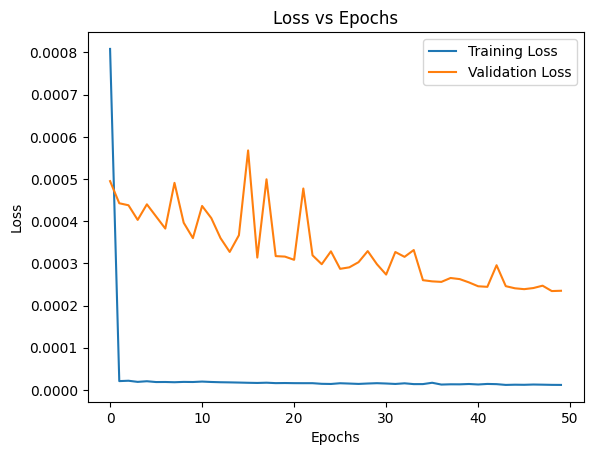

In [19]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


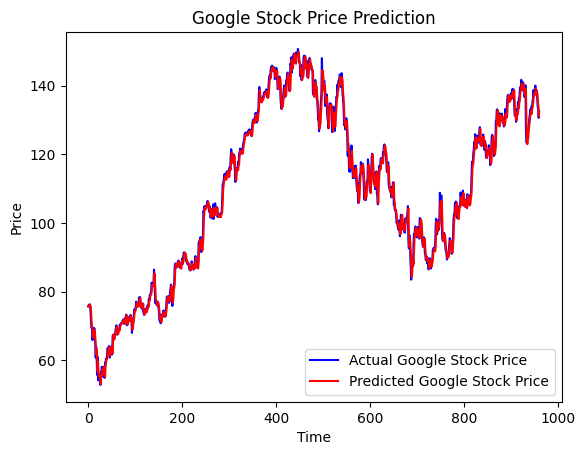

In [20]:
predicted_price=model.predict(x_test)

predicted_price=scaler.inverse_transform(predicted_price)

y_test_actual=scaler.inverse_transform(y_test.reshape(-1,1))


plt.plot(y_test_actual, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_price, color='red', label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()